In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss, make_scorer, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

In [8]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')

train_2 = pd.read_csv('train_2.csv')
test_2 = pd.read_csv('test_2.csv')


to_drop = ['id','fault_severity']
y = train['fault_severity']
y_2 = train_2['fault_severity']


train.drop(to_drop, axis=1, inplace=True)
test.drop(to_drop[:1], inplace=True, axis=1)


train_2.drop(to_drop, axis=1, inplace=True)
test_2.drop(to_drop[:1], inplace=True, axis=1)

X = train
X_2 = train_2


print('Train: ', train.shape)
print('Test: ', test.shape)
print('Train_2: ', train_2.shape)
print('Test_2: ', test_2.shape)

Train:  (7381, 84)
Test:  (11171, 84)
Train_2:  (7381, 267)
Test_2:  (11171, 267)


In [9]:
model = GradientBoostingClassifier()
cv = cross_val_score(model, X, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
print('log_loss :',np.mean(cv))

log_loss : 0.5797606886265291


In [10]:
model = GradientBoostingClassifier()
cv = cross_val_score(model, X_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
print('log_loss_2 :',np.mean(cv))

log_loss_2 : 0.5587940105551452


In [11]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled_2 = StandardScaler().fit_transform(X_2)

# Seleccion de features

In [ ]:
#selector = SelectKBest(mutual_info_classif, k = 64)
#selector.fit(X,y)
#selector_features = pd.Series(selector.scores_)

In [ ]:
#model_features = pd.Series(model.fit(X, y).feature_importances_)

In [ ]:
#selector_features_zeros = selector_features[selector_features == 0].index
#model_features_zeros = model_features[model_features == 0].index

In [ ]:
#pd.Series(model_features_zeros.isin(selector_features_zeros)).value_counts()

True     16
False     7
dtype: int64

In [ ]:
#print('Features Selector: ', len(selector_features_zeros))
#print('Model Selector: ', len(model_features_zeros))

Features Selector:  25
Model Selector:  23


In [ ]:
# Creando otros datasets con reduccion de features
#X_selector_features = selector.transform(X)
#X_model_features = X[:,list(model_features[model_features != 0].index)]

In [ ]:
#print(X_selector_features.shape)
#print(X_model_features.shape)

(7381, 64)
(7381, 61)


# Explorando algunas configuraciones para ver si hay diferencias significativas en la seleccion de features

In [ ]:
#Explorando Learning rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
for rate in learning_rates:
  print('learning_rate: {}'.format(rate))
  model = GradientBoostingClassifier(learning_rate=rate)

  
  cv = cross_val_score(model, X, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled:',np.mean(cv_scaled))

  cv = cross_val_score(model, X_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal_2:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled_2:',np.mean(cv_scaled))



  #cv_selector = cross_val_score(model, X_selector_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  #cv_model = cross_val_score(model, X_model_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))




  #print('log_loss_selector:',np.mean(cv_selector))
  #print('log_loss_model:',np.mean(cv_model))
  print('__'*20)

learning_rate: 1
log_loss_normal: 0.6757316523244108
log_loss_scaled: 0.6757072990224782
log_loss_normal_2: 0.6731948213472368
log_loss_scaled_2: 0.6691173692772026
________________________________________
learning_rate: 0.5
log_loss_normal: 0.5802708636613513
log_loss_scaled: 0.5764201985351942
log_loss_normal_2: 0.5474870295504296
log_loss_scaled_2: 0.5519166097659621
________________________________________
learning_rate: 0.25
log_loss_normal: 0.5569741356595201
log_loss_scaled: 0.557221732741579
log_loss_normal_2: 0.5374604996918831
log_loss_scaled_2: 0.5364652059653995
________________________________________
learning_rate: 0.1
log_loss_normal: 0.5797996081563771
log_loss_scaled: 0.5797144138923297
log_loss_normal_2: 0.5585793495023701
log_loss_scaled_2: 0.5587060488611008
________________________________________
learning_rate: 0.05
log_loss_normal: 0.6049939845752661
log_loss_scaled: 0.605001253676208
log_loss_normal_2: 0.5809677668007277
log_loss_scaled_2: 0.5809793431340788
___

Se obtuvo un mejor performance entre los valores de 0.1 y 0.5 sin diferencia significativa en la la reduccion de la dimension

In [ ]:
#Explorando n_estimators
n_estimators = [100,300,500,700]
for n in n_estimators:
  print('n_estimators: {}'.format(n))
  model = GradientBoostingClassifier(learning_rate=0.1,
                                     n_estimators = n)
  

  cv = cross_val_score(model, X, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled:',np.mean(cv_scaled))

  cv = cross_val_score(model, X_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal_2:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled_2:',np.mean(cv_scaled))


  #cv_selector = cross_val_score(model, X_selector_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  #cv_model = cross_val_score(model, X_model_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))


  #print('log_loss_selector:',np.mean(cv_selector))
  #print('log_loss_model:',np.mean(cv_model))
  print('__'*20)

n_estimators: 100
log_loss_normal: 0.5796424729936192
log_loss_scaled: 0.5798056319358651
log_loss_normal_2: 0.5587139918649036
log_loss_scaled_2: 0.5588190808155445
________________________________________
n_estimators: 300
log_loss_normal: 0.5533659195969174
log_loss_scaled: 0.5533006753202276
log_loss_normal_2: 0.533847794842595
log_loss_scaled_2: 0.5337433042844643
________________________________________
n_estimators: 500
log_loss_normal: 0.5524969095129266
log_loss_scaled: 0.5527578162081834
log_loss_normal_2: 0.5320054979300892
log_loss_scaled_2: 0.532043406583292
________________________________________
n_estimators: 700
log_loss_normal: 0.5586118723180455
log_loss_scaled: 0.5592284020427745
log_loss_normal_2: 0.5371383023999352
log_loss_scaled_2: 0.5367254063234762
________________________________________


In [ ]:
max_depths = np.linspace(1, 10, 10, endpoint=True)
for max in max_depths:
  model = GradientBoostingClassifier(max_depth= max)
  print('max_depths: {}'.format(max))

  cv = cross_val_score(model, X, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled:',np.mean(cv_scaled))

  cv = cross_val_score(model, X_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal_2:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled_2:',np.mean(cv_scaled))

  #cv_selector = cross_val_score(model, X_selector_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  #cv_model = cross_val_score(model, X_model_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))


  #print('log_loss_selector:',np.mean(cv_selector))
  #print('log_loss_model:',np.mean(cv_model))
  print('__'*20)

max_depths: 1.0
log_loss_normal: 0.6709821235964869
log_loss_scaled: 0.6709895775792031
log_loss_normal_2: 0.6320804913502924
log_loss_scaled_2: 0.6320924467605272
________________________________________
max_depths: 2.0
log_loss_normal: 0.6202230928086273
log_loss_scaled: 0.6203146598696236
log_loss_normal_2: 0.586227468257601
log_loss_scaled_2: 0.5861717815737865
________________________________________
max_depths: 3.0
log_loss_normal: 0.579672052602409
log_loss_scaled: 0.5798742031635449
log_loss_normal_2: 0.5587701828535918
log_loss_scaled_2: 0.5587463919183201
________________________________________
max_depths: 4.0
log_loss_normal: 0.5587262477687904
log_loss_scaled: 0.5588479776305736
log_loss_normal_2: 0.5408290424501442
log_loss_scaled_2: 0.5415957492293664
________________________________________
max_depths: 5.0
log_loss_normal: 0.5492102983927423
log_loss_scaled: 0.5488929257767114
log_loss_normal_2: 0.5318152754736312
log_loss_scaled_2: 0.5326153680873281
__________________

In [ ]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
for n in min_samples_splits:
  model = GradientBoostingClassifier(min_samples_split = n)
  print('min_samples_split: {}'.format(n))
  
  cv = cross_val_score(model, X, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled:',np.mean(cv_scaled))

  cv = cross_val_score(model, X_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_normal_2:',np.mean(cv))

  cv_scaled = cross_val_score(model, X_scaled_2, y_2, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  print('log_loss_scaled_2:',np.mean(cv_scaled))

  #cv_selector = cross_val_score(model, X_selector_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))
  #cv_model = cross_val_score(model, X_model_features, y, scoring=make_scorer(log_loss, needs_proba=True, labels=y))

  #print('log_loss_selector:',np.mean(cv_selector))
  #print('log_loss_model:',np.mean(cv_model))
  print('__'*20)

min_samples_split: 0.1
log_loss_normal: 0.5891964112582162
log_loss_scaled: 0.5892034158877879
log_loss_normal_2: 0.568950858530626
log_loss_scaled_2: 0.568890980385864
________________________________________
min_samples_split: 0.2
log_loss_normal: 0.5987003965157532
log_loss_scaled: 0.598764150419194
log_loss_normal_2: 0.5725706900583025
log_loss_scaled_2: 0.5725862976873491
________________________________________
min_samples_split: 0.30000000000000004
log_loss_normal: 0.6077509716500306
log_loss_scaled: 0.6077106012010367
log_loss_normal_2: 0.5755834347328331
log_loss_scaled_2: 0.5757303612814858
________________________________________
min_samples_split: 0.4
log_loss_normal: 0.6146776455256552
log_loss_scaled: 0.6146786500536445
log_loss_normal_2: 0.5792408343986313
log_loss_scaled_2: 0.5792613466905789
________________________________________
min_samples_split: 0.5
log_loss_normal: 0.6226300927088758
log_loss_scaled: 0.6227061271045613
log_loss_normal_2: 0.5842526035357538
log_lo

Conclusion: el datset 2 tiene mejor desempeño, proceder a realizar un GridSearchCV para obtener el modelo final

# GridSearchCV

In [ ]:
param_grid = {
    'learning_rate':[0.25,0.20],
    'n_estimators':[500,600],
    'max_depth':[6,7],
    'subsample':[0.8,0.9,1],
    'min_samples_split': [0.1],
    'max_features':['sqrt'],
    }

In [ ]:
model = GradientBoostingClassifier()
gs = GridSearchCV(model, param_grid, cv = 3, scoring=make_scorer(log_loss, needs_proba=True, labels=y, greater_is_better = False), verbose = 5)
gs.fit(X_scaled_2, y_2)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.8, score=-0.579, total=   9.0s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.8, score=-0.515, total=   9.3s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.3s remaining:    0.0s


[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.8, score=-0.563, total=   8.9s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.9 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.2s remaining:    0.0s


[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.9, score=-0.586, total=   9.5s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.9 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.8s remaining:    0.0s


[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.9, score=-0.521, total=  10.5s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.9 
[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=0.9, score=-0.564, total=   9.4s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=1, score=-0.589, total=   9.5s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=1 
[CV]  learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, subsample=1, score=-0.524, total=   9.6s
[CV] learning_rate=0.25, max_depth=6, max_features=sqrt, min_samples_split=0.1, n_estimators=500, sub

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed: 12.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
             para

In [ ]:
gs.cv_results_['mean_test_score'], gs.best_params_, gs.best_score_ 

(array([-0.55230439, -0.55711585, -0.5589698 , -0.56176143, -0.56352958,
        -0.57153739, -0.56289086, -0.56375714, -0.56864136, -0.57093895,
        -0.57522511, -0.57709275, -0.54995204, -0.55263935, -0.55148306,
        -0.55023377, -0.55503453, -0.55825155, -0.55299942, -0.55540962,
        -0.55541795, -0.56061617, -0.55822484, -0.56304757]),
 {'learning_rate': 0.2,
  'max_depth': 6,
  'max_features': 'sqrt',
  'min_samples_split': 0.1,
  'n_estimators': 500,
  'subsample': 0.8},
 -0.5499520416965674)

# Analizis de Resultados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_2, y_2, test_size = 0.3, random_state = 1)

In [ ]:
params =  {'learning_rate': 0.2,
  'max_depth': 6,
  'max_features': 'sqrt',
  'min_samples_split': 0.1,
  'n_estimators': 500,
  'subsample': 0.8}
model = GradientBoostingClassifier(**params)

In [ ]:
%%time 
model.fit(X_train, y_train)

CPU times: user 10.1 s, sys: 3.95 ms, total: 10.1 s
Wall time: 10.1 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
feature_importance = pd.DataFrame({'index':X_2.columns,
                                   'importance':model.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'importance', ascending=False)
feature_importance = feature_importance[feature_importance['importance'] != 0]

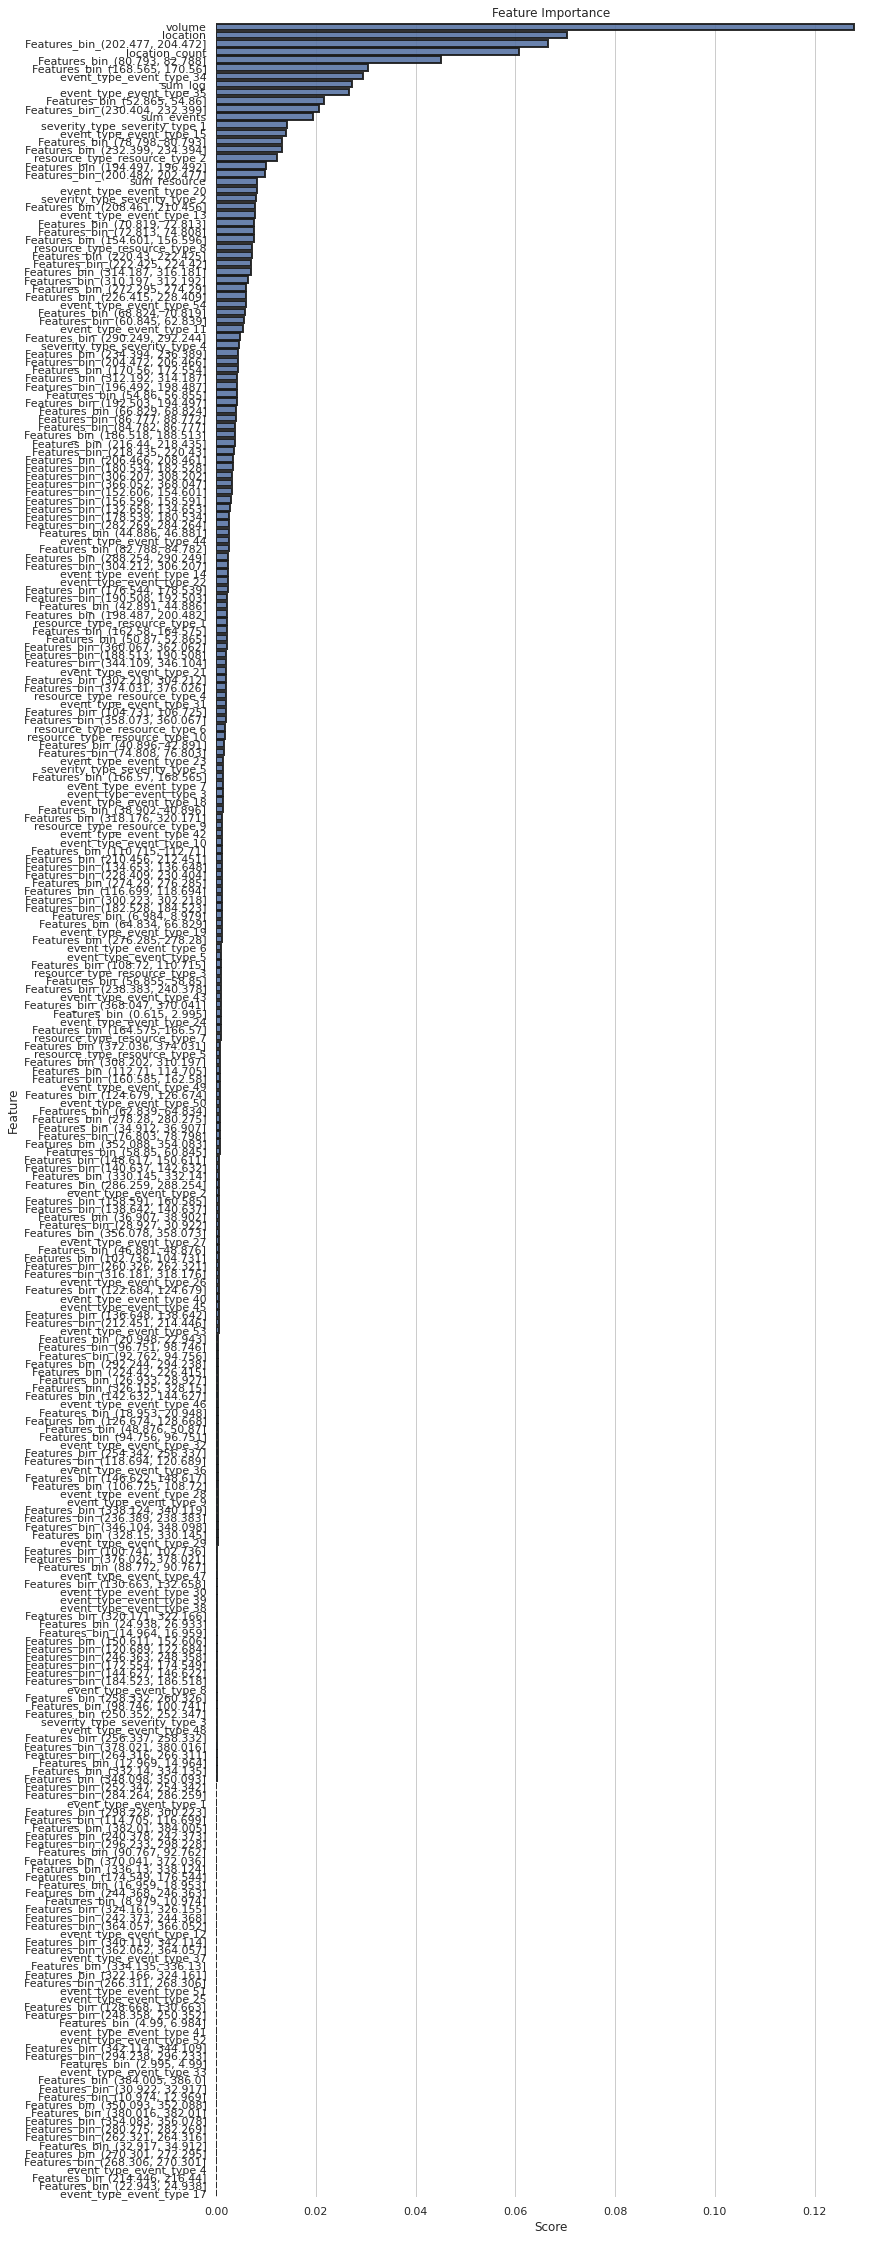

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 40))

kwargs = {'alpha':0.9, 'linewidth':2, 'edgecolor':'k'}

sns.barplot(x="importance", y = 'index', data=features_importance,
            label="index", color="b", **kwargs)


ax.set(ylabel="Feature",
       xlabel="Score")

sns.despine(left=True, bottom=True)

ax.set_title('Feature Importance')

plt.show()

f.savefig('Feature_importance_GBC.png', dpi=100,
            bbox_inches='tight')

In [ ]:
y_pred  = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[1215,  167,   35],
       [ 226,  309,   48],
       [  53,   57,  105]])

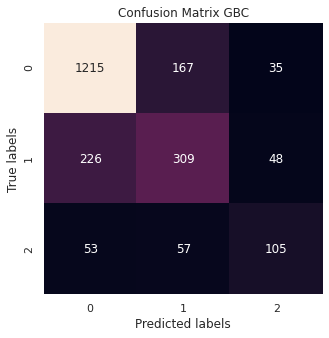

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, ax = ax, cbar=False, fmt='g'); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix GBC'); 
ax.xaxis.set_ticklabels(['0', '1', '2']); ax.yaxis.set_ticklabels(['0', '1', '2']);
plt.show()

f.savefig('confusion_matrix_GBC.png', dpi=100,
          bbox_inches='tight')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1417
           1       0.58      0.53      0.55       583
           2       0.56      0.49      0.52       215

    accuracy                           0.74      2215
   macro avg       0.65      0.63      0.64      2215
weighted avg       0.73      0.74      0.73      2215



In [ ]:
log_loss(y_test, model.predict_proba(X_test))

0.5841100331946453

# Creando Submission

In [12]:
params =  {'learning_rate': 0.2,
  'max_depth': 6,
  'max_features': 'sqrt',
  'min_samples_split': 0.1,
  'n_estimators': 500,
  'subsample': 0.8}
model = GradientBoostingClassifier(**params)

In [13]:
%%time 
model.fit(X_scaled_2, y_2) #Entrenano con todos los datos del dataset train_2 que obtuvo mejor desempeño en la exploracion de features

CPU times: user 9.61 s, sys: 3.96 ms, total: 9.62 s
Wall time: 9.63 s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=6,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
X_submision = StandardScaler().fit_transform(test_2)
y_submision =  model.predict_proba(X_submision)

In [ ]:
test = pd.read_csv('test_2.csv')
pred_df=pd.DataFrame(y_submision,columns=['predict_0', 'predict_1', 'predict_2'])
submission=pd.concat([test[['id']],pred_df],axis=1)
submission.to_csv('submission_2.csv',index=False,header=True)

In [14]:
with open('submission_2.pkl', 'wb') as file:
    pickle.dump(model, file=file)